In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
data=pd.read_excel('Datos resistencias y l-a.xlsx', sheet_name='Hoja2')

In [3]:
data

,Medición directa de la resistencia,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Medición indirecta de la resistencia,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,cromoniquel 0.35 mm,NaN,NaN,A,9.62113e-08,NaN,cromoniquel 0.35 mm,NaN,NaN,NaN
1,L,L/A,incertidumbre,Resistencia,incertidumbre r,NaN,V,I,resistencia1,incertidumbre r1
2,0.08,831503,5196.9,0.9,0.018,NaN,0.22,0.22,1,0.91
3,0.16,1.66301e+06,5196.9,1.7,0.034,NaN,0.37,0.22,1.68182,0.91062
4,0.24,2.49451e+06,5196.9,2.8,0.056,NaN,0.52,0.21,2.47619,0.954739
5,0.32,3.32601e+06,5196.9,3.7,0.074,NaN,0.72,0.21,3.42857,0.955646
6,0.4,4.15752e+06,5196.9,4.6,0.092,NaN,0.89,0.21,4.2381,0.956417
7,0.48,4.98902e+06,5196.9,5.7,0.114,NaN,1.12,0.2,5.6,1.0056
8,0.56,5.82052e+06,5196.9,6.8,0.136,NaN,1.27,0.2,6.35,1.00635
9,0.64,6.65203e+06,5196.9,7.7,0.154,NaN,1.41,0.2,7.05,1.00705


## Cromoniquel 0.35 mm

Medición directa de la resistencia 

In [5]:
LA_cromoniquel035=data['Unnamed: 1'][2:12]
incertidumbre_LA_cromoniquel035=data['Unnamed: 2'][2:12]
resistencia_cromoniquel035=data['Unnamed: 3'][2:12]
incertidumbre_resistencia_cromoniquel035=data['Unnamed: 4'][2:12]

In [7]:
LA1_cromoniquel035=data['Unnamed: 1'][2:12]
incertidumbre1_LA_cromoniquel035=data['Unnamed: 2'][2:12]
resistencia1_cromoniquel035=data['Unnamed: 8'][2:12]
incertidumbre1_resistencia_cromoniquel035=data['Unnamed: 9'][2:12]

Ajuste de una función

In [5]:
def func(x, a, b):
    return a*x+b

param, cov = curve_fit(func, LA_cromoniquel035, resistencia_cromoniquel035, sigma=incertidumbre_LA_cromoniquel035, absolute_sigma=True)
print(param)                   #Parametros de ajuste
print(np.sqrt(np.diag(cov)))

[ 1.14433109e-06 -7.33334028e-02]
[6.88102698e-04 3.55015678e+03]


In [10]:
def func1(x, a, b):
    return a*x+b

param1, cov1 = curve_fit(func1, LA1_cromoniquel035, resistencia1_cromoniquel035, sigma=incertidumbre1_LA_cromoniquel035, absolute_sigma=True)
print(param1)                   #Parametros de ajuste
print(np.sqrt(np.diag(cov1)))

[ 1.11411264e-06 -1.65300346e-01]
[6.88102395e-04 3.55015612e+03]


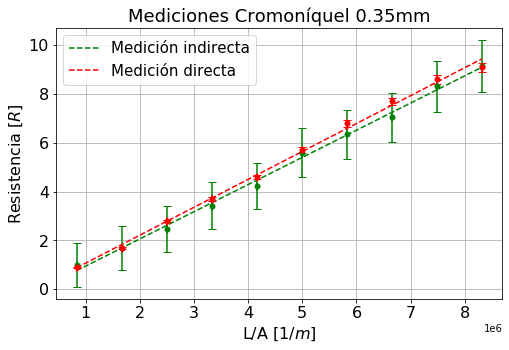

In [22]:
plt.figure(figsize=(8, 5)) 

(_, caps, _) = plt.errorbar(LA1_cromoniquel035,  resistencia1_cromoniquel035, xerr=incertidumbre1_LA_cromoniquel035 , yerr= incertidumbre1_resistencia_cromoniquel035, fmt='o', color='green', markersize=5, capsize=4, ecolor = 'green', label='')

#Graficamos la función de ajustr
plt.plot(LA1_cromoniquel035, func1(LA1_cromoniquel035, *param1), color ='green', linestyle='--', label='Medición indirecta')

#Graficamos las barras de error junto con los marcadores de los datos
(_, caps, _) = plt.errorbar(LA_cromoniquel035,  resistencia_cromoniquel035, xerr=incertidumbre_LA_cromoniquel035 , yerr= incertidumbre_resistencia_cromoniquel035, fmt='o', color='red', markersize=5, capsize=4, ecolor = 'red', label='')

#Graficamos la función de ajustr
plt.plot(LA_cromoniquel035, func(LA_cromoniquel035, *param), color ='red', linestyle='--', label='Medición directa')
plt.legend() #mostrar leyendes de los datos y ajuste

#---------------------------------------------------
##Definimos titulos, tamaño de fuente y de etiquetas
#---------------------------------------------------

#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Mediciones Cromoníquel 0.35mm', fontsize = 18)
plt.legend(fontsize = 15, loc='upper left')

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('Resistencia [$R$]', fontsize = 16)
plt.xlabel('L/A [$1/m$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.grid(True) #mostramos la rejilla de fondo
plt.show() #mostramos todo lo que graficamos

## Constantan 0.4 mm

In [23]:
LA2_constantan04=data['Unnamed: 1'][17:27]
incertidumbre2_LA_constantan04=data['Unnamed: 2'][17:27]
resistencia2_constantan04=data['Unnamed: 3'][17:27]
incertidumbre2_resistencia_constantan04=data['Unnamed: 4'][17:27]

In [24]:
LA3_constantan04=data['Unnamed: 1'][17:27]
incertidumbre3_LA_constantan04=data['Unnamed: 2'][17:27]
resistencia3_constantan04=data['Unnamed: 8'][17:27]
incertidumbre3_resistencia_constantan04=data['Unnamed: 9'][17:27]

In [25]:
def func2(x, a, b):
    return a*x+b

param2, cov2 = curve_fit(func2, LA2_constantan04, resistencia2_constantan04, sigma=incertidumbre2_LA_constantan04, absolute_sigma=True)
print(param2)                   #Parametros de ajuste
print(np.sqrt(np.diag(cov2)))

[4.57910929e-07 4.66666660e-02]
[6.88102356e-04 2.71808810e+03]


In [26]:
def func3(x, a, b):
    return a*x+b

param3, cov3 = curve_fit(func3, LA3_constantan04, resistencia3_constantan04, sigma=incertidumbre3_LA_constantan04, absolute_sigma=True)
print(param2)                   #Parametros de ajuste
print(np.sqrt(np.diag(cov3)))

[4.57910929e-07 4.66666660e-02]
[6.88102193e-04 2.71808798e+03]


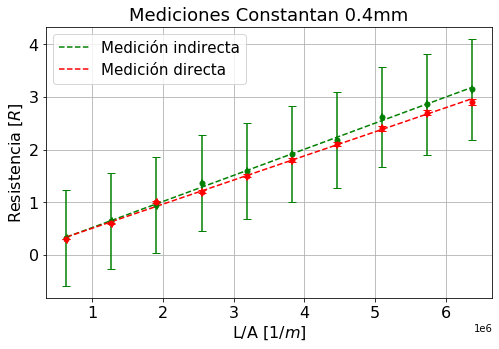

In [49]:
plt.figure(figsize=(8, 5)) 

(_, caps, _) = plt.errorbar(LA3_constantan04,  resistencia3_constantan04, xerr=incertidumbre3_LA_constantan04 , yerr= incertidumbre3_resistencia_constantan04, fmt='o', color='green', markersize=5, capsize=4, ecolor = 'green', label='')

#Graficamos la función de ajustr
plt.plot(LA3_constantan04, func3(LA3_constantan04, *param3), color ='green', linestyle='--', label='Medición indirecta')
#Graficamos las barras de error junto con los marcadores de los datos
(_, caps, _) = plt.errorbar(LA2_constantan04,  resistencia2_constantan04, xerr=incertidumbre2_LA_constantan04 , yerr= incertidumbre2_resistencia_constantan04, fmt='o', color='red', markersize=5, capsize=4, ecolor = 'red', label='')

#Graficamos la función de ajustr
plt.plot(LA2_constantan04, func2(LA2_constantan04, *param2), color ='red', linestyle='--', label='Medición directa')
plt.legend() #mostrar leyendes de los datos y ajuste

#---------------------------------------------------
##Definimos titulos, tamaño de fuente y de etiquetas
#---------------------------------------------------

#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Mediciones Constantan 0.4mm', fontsize = 18)
plt.legend(fontsize = 15, loc='upper left')

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('Resistencia [$R$]', fontsize = 16)
plt.xlabel('L/A [$1/m$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.grid(True) #mostramos la rejilla de fondo
plt.show() #mostramos todo lo que graficamos

In [34]:
data1=pd.read_excel('Datos resistencias y l-a.xlsx', sheet_name='Hoja1')

In [35]:
data1

,Medición directa de la resistencia,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Medición indirecta de la resistencia,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,cromoniquel 0.4 mm,NaN,NaN,A,1.25664e-07,NaN,cromoniquel 0.4 mm,NaN,NaN,NaN
1,L,L/A,incertidumbre,Resistencia,incertidumbre r,NaN,V,I,resistencia1,incertidumbre r1
2,0.08,636620,3978.87,0.8,0.016,NaN,0.16,0.22,0.727273,0.909752
3,0.16,1.27324e+06,3978.87,1.5,0.03,NaN,0.32,0.22,1.45455,0.910413
4,0.24,1.90986e+06,3978.87,2.3,0.046,NaN,0.48,0.21,2.28571,0.954558
5,0.32,2.54648e+06,3978.87,3.1,0.062,NaN,0.61,0.21,2.90476,0.955147
6,0.4,3.1831e+06,3978.87,3.7,0.074,NaN,0.74,0.21,3.52381,0.955737
7,0.48,3.81972e+06,3978.87,4.1,0.082,NaN,0.85,0.21,4.04762,0.956236
8,0.56,4.45634e+06,3978.87,4.7,0.094,NaN,0.98,0.21,4.66667,0.956825
9,0.64,5.09296e+06,3978.87,5.7,0.114,NaN,1.13,0.2,5.65,1.00565


## Cromoniquel 0.4 mm

In [37]:
LA_cromoniquel04=data1['Unnamed: 1'][2:12]
incertidumbre_LA_cromoniquel04=data1['Unnamed: 2'][2:12]
resistencia_cromoniquel04=data1['Unnamed: 3'][2:12]
incertidumbre_resistencia_cromoniquel04=data1['Unnamed: 4'][2:12]

In [38]:
LA1_cromoniquel04=data1['Unnamed: 1'][2:12]
incertidumbre1_LA_cromoniquel04=data1['Unnamed: 2'][2:12]
resistencia1_cromoniquel04=data1['Unnamed: 8'][2:12]
incertidumbre1_resistencia_cromoniquel04=data1['Unnamed: 9'][2:12]

In [40]:
def func4(x, a, b):
    return a*x+b

param4, cov4 = curve_fit(func4, LA_cromoniquel04, resistencia_cromoniquel04, sigma=incertidumbre_LA_cromoniquel04, absolute_sigma=True)
print(param4)                   #Parametros de ajuste
print(np.sqrt(np.diag(cov4)))

[1.07766148e-06 1.66666650e-01]
[6.88102250e-04 2.71808784e+03]


In [41]:
def func5(x, a, b):
    return a*x+b

param5, cov5 = curve_fit(func5, LA1_cromoniquel04, resistencia1_cromoniquel04, sigma=incertidumbre1_LA_cromoniquel04, absolute_sigma=True)
print(param5)                   #Parametros de ajuste
print(np.sqrt(np.diag(cov5)))

[1.06389254e-06 1.15916305e-01]
[6.88102419e-04 2.71808842e+03]


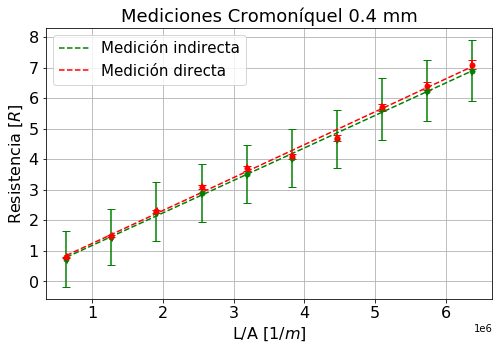

In [50]:
plt.figure(figsize=(8, 5)) 

(_, caps, _) = plt.errorbar(LA1_cromoniquel04,  resistencia1_cromoniquel04, xerr=incertidumbre1_LA_cromoniquel04 , yerr= incertidumbre1_resistencia_cromoniquel04, fmt='o', color='green', markersize=5, capsize=4, ecolor = 'green', label='')

#Graficamos la función de ajustr
plt.plot(LA1_cromoniquel04, func1(LA1_cromoniquel04, *param5), color ='green', linestyle='--', label='Medición indirecta')

#Graficamos las barras de error junto con los marcadores de los datos
(_, caps, _) = plt.errorbar(LA_cromoniquel04,  resistencia_cromoniquel04, xerr=incertidumbre_LA_cromoniquel04 , yerr= incertidumbre_resistencia_cromoniquel04, fmt='o', color='red', markersize=5, capsize=4, ecolor = 'red', label='')

#Graficamos la función de ajustr
plt.plot(LA_cromoniquel04, func(LA_cromoniquel04, *param4), color ='red', linestyle='--', label='Medición directa')
plt.legend() #mostrar leyendes de los datos y ajuste

#---------------------------------------------------
##Definimos titulos, tamaño de fuente y de etiquetas
#---------------------------------------------------

#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Mediciones Cromoníquel 0.4 mm', fontsize = 18)
plt.legend(fontsize = 15, loc='upper left')

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('Resistencia [$R$]', fontsize = 16)
plt.xlabel('L/A [$1/m$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.grid(True) #mostramos la rejilla de fondo
plt.show() #mostramos todo lo que graficamos

## Constantan 0.25 mm

In [43]:
LA2_constantan025=data1['Unnamed: 1'][17:27]
incertidumbre2_LA_constantan025=data1['Unnamed: 2'][17:27]
resistencia2_constantan025=data1['Unnamed: 3'][17:27]
incertidumbre2_resistencia_constantan025=data1['Unnamed: 4'][17:27]

In [44]:
LA3_constantan025=data1['Unnamed: 1'][17:27]
incertidumbre3_LA_constantan025=data1['Unnamed: 2'][17:27]
resistencia3_constantan025=data1['Unnamed: 8'][17:27]
incertidumbre3_resistencia_constantan025=data1['Unnamed: 9'][17:27]

In [45]:
def func6(x, a, b):
    return a*x+b

param6, cov6 = curve_fit(func6, LA2_constantan025, resistencia2_constantan025, sigma=incertidumbre2_LA_constantan025, absolute_sigma=True)
print(param6)                   #Parametros de ajuste
print(np.sqrt(np.diag(cov6)))

[ 5.11326925e-07 -7.33332867e-02]
[6.88102382e-04 6.95830726e+03]


In [46]:
def func7(x, a, b):
    return a*x+b

param7, cov7 = curve_fit(func7, LA3_constantan025, resistencia3_constantan025, sigma=incertidumbre3_LA_constantan025, absolute_sigma=True)
print(param7)                   #Parametros de ajuste
print(np.sqrt(np.diag(cov7)))

[ 5.19689522e-07 -5.85919309e-02]
[6.88102337e-04 6.95830592e+03]


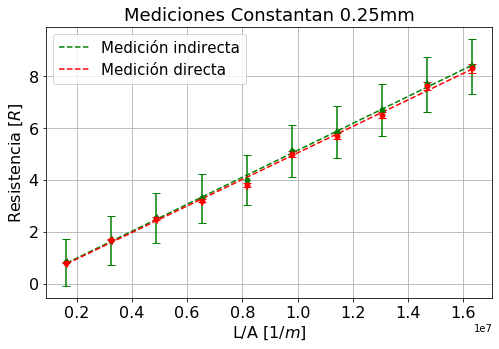

In [51]:
plt.figure(figsize=(8, 5)) 

(_, caps, _) = plt.errorbar(LA3_constantan025,  resistencia3_constantan025, xerr=incertidumbre3_LA_constantan025 , yerr= incertidumbre3_resistencia_constantan025, fmt='o', color='green', markersize=5, capsize=4, ecolor = 'green', label='')

#Graficamos la función de ajustr
plt.plot(LA3_constantan025, func3(LA3_constantan025, *param7), color ='green', linestyle='--', label='Medición indirecta')
#Graficamos las barras de error junto con los marcadores de los datos
(_, caps, _) = plt.errorbar(LA2_constantan025,  resistencia2_constantan025, xerr=incertidumbre2_LA_constantan025 , yerr= incertidumbre2_resistencia_constantan025, fmt='o', color='red', markersize=5, capsize=4, ecolor = 'red', label='')

#Graficamos la función de ajustr
plt.plot(LA2_constantan025, func2(LA2_constantan025, *param6), color ='red', linestyle='--', label='Medición directa')
plt.legend() #mostrar leyendes de los datos y ajuste

#---------------------------------------------------
##Definimos titulos, tamaño de fuente y de etiquetas
#---------------------------------------------------

#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Mediciones Constantan 0.25mm', fontsize = 18)
plt.legend(fontsize = 15, loc='upper left')

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('Resistencia [$R$]', fontsize = 16)
plt.xlabel('L/A [$1/m$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.grid(True) #mostramos la rejilla de fondo
plt.show() #mostramos todo lo que graficamos